In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [6]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [10]:
X_test[0].shape

(28, 28)

In [11]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

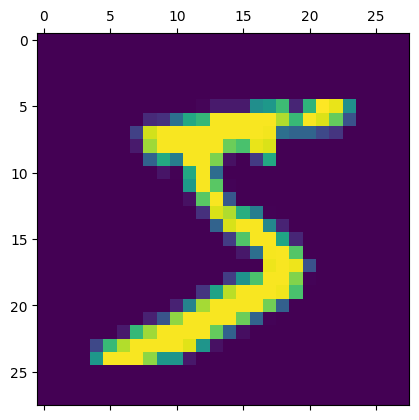

In [13]:
plt.matshow(X_train[0])

In [14]:
y_train[0]

5

In [33]:
X_train = X_train / 255
X_test = X_test / 255

### Reshaping the dataset

In [20]:
X_train.shape

(60000, 28, 28)

In [34]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

### Simple neural network

In [35]:
model = keras.Sequential(
    [
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4654 - accuracy: 0.8785
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9230
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9255
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9278


In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9264


[0.2669300436973572, 0.9264000058174133]

In [37]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [38]:
y_predicted[0]

array([2.1994451e-02, 1.7355445e-07, 5.2124962e-02, 9.4879425e-01,
       2.1683089e-03, 8.8949293e-02, 5.3609841e-07, 9.9976802e-01,
       8.0330662e-02, 6.7587143e-01], dtype=float32)

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
y_predicted_labels[0]

7

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    9,  930,   18,    9,    1,   12,    8,   34,    4],
       [   4,    0,   19,  927,    1,   19,    3,    9,   21,    7],
       [   2,    1,    5,    2,  922,    0,    8,    4,    9,   29],
       [  12,    3,    4,   42,   12,  758,   16,    7,   31,    7],
       [  16,    3,    8,    1,    7,    9,  912,    1,    1,    0],
       [   2,    6,   28,    6,   10,    0,    0,  941,    2,   33],
       [  10,   12,    6,   20,    9,   20,    9,   11,  870,    7],
       [  11,    7,    1,   10,   30,    4,    0,   16,    7,  923]])>

Text(95.72222222222221, 0.5, 'Truth')

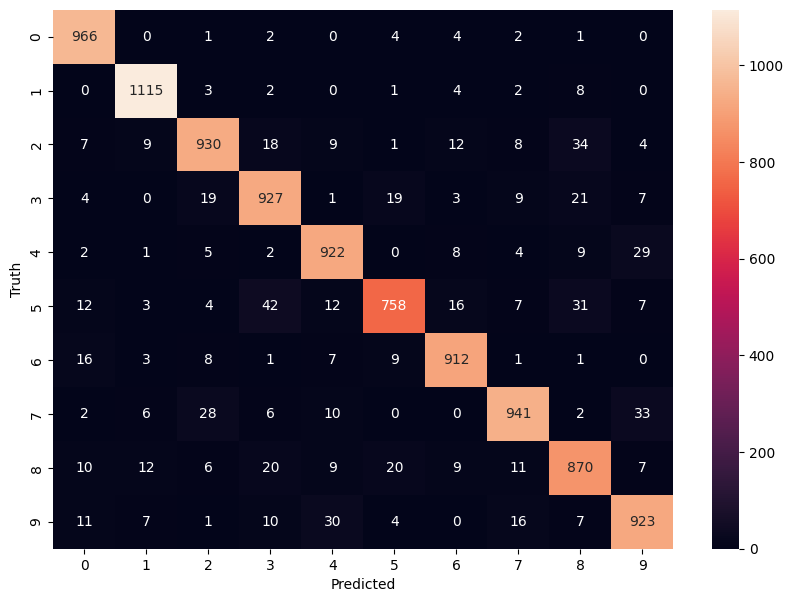

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model = keras.Sequential(
    [
    keras.layers.Dense(200,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2389 - accuracy: 0.9311
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1003 - accuracy: 0.9702
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0483 - accuracy: 0.9848
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9905


In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

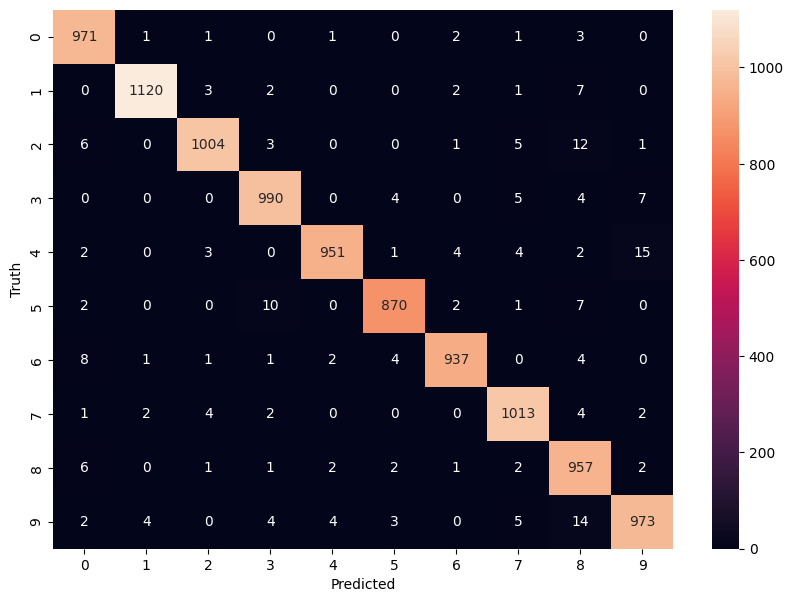

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')